# String Functions

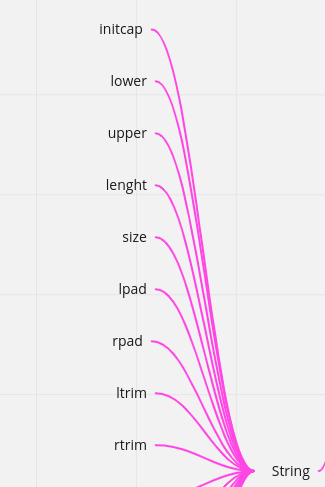
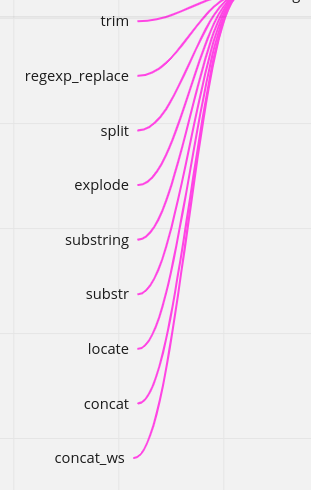

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )

# Create a PySpark DataFrame with some data
data = [("Alice", 25), ("Bob   ", 30), ("  Charlie", 30), ("Gabriel", None), (" amanda ", None)]
columns = ["name", "age"]
df = spark.createDataFrame(data, columns)

# Show the sorted DataFrame
df.show()

## [initcap](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.initcap.html?highlight=initcap#pyspark.sql.functions.initcap)

pyspark.sql.functions.initcap(col: ColumnOrName) → pyspark.sql.column.Column

Translate the first letter of each word to upper case in the sentence.

In [ ]:
df = df.withColumn('initcap', F.initcap('name'))
df.toPandas()

## [lower](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.lower.html)

pyspark.sql.functions.lower(col: ColumnOrName) → pyspark.sql.column.Column

Converts a string expression to lower case.

In [ ]:
df = df.withColumn('lower', F.lower('name'))
df.toPandas()

## [upper](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.upper.html)

pyspark.sql.functions.upper(col: ColumnOrName) → pyspark.sql.column.Column

Converts a string expression to upper case.

In [ ]:
df = df.withColumn('upper', F.upper('name'))
df.toPandas()

## [length](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.length.html)

pyspark.sql.functions.length(col: ColumnOrName) → pyspark.sql.column.Column

Computes the character length of string data or number of bytes of binary data. The length of character data includes the trailing spaces. The length of binary data includes binary zeros.

In [ ]:
df = df.withColumn('length', F.length(F.col('name')))
df.toPandas()

## [lpad](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.lpad.html)

pyspark.sql.functions.lpad(col: ColumnOrName, len: int, pad: str) → pyspark.sql.column.Column

Left-pad the string column to width len with pad.

In [ ]:
df = df.withColumn('lpad', F.lpad(F.col('name'), 7, '#'))

df.toPandas()

## [rpad](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.rpad.html)

pyspark.sql.functions.rpad(col: ColumnOrName, len: int, pad: str) → pyspark.sql.column.Column

Right-pad the string column to width len with pad.

In [ ]:
df = df.withColumn('rpad', F.rpad(F.col('name'), 7, '#'))

df.toPandas()

## [ltrim](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.ltrim.html)

pyspark.sql.functions.ltrim(col: ColumnOrName) → pyspark.sql.column.Column

Trim the spaces from left end for the specified string value.

In [ ]:
df = df.withColumn('ltrim', F.ltrim(F.col('name')))

df.toPandas()

In [ ]:
df.select('name', 'ltrim').collect()

## [rtrim](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.rtrim.html)

pyspark.sql.functions.rtrim(col: ColumnOrName) → pyspark.sql.column.Column

Trim the spaces from right end for the specified string value.

In [ ]:
df = df.withColumn('rtrim', F.rtrim(F.col('name')))

df.toPandas()

In [ ]:
df.select('name', 'rtrim').collect()

## [trim](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.trim.html)

pyspark.sql.functions.trim(col: ColumnOrName) → pyspark.sql.column.Column

Trim the spaces from both ends for the specified string column.

In [ ]:
df = df.withColumn('trim', F.trim(F.col('name')))

df.toPandas()

In [ ]:
df.select('name', 'trim').collect()

## [concat](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.concat.html)

pyspark.sql.functions.concat(*cols: ColumnOrName) → pyspark.sql.column.Column

Concatenates multiple input columns together into a single column. The function works with strings, binary and compatible array columns.

In [ ]:
df = df.drop('initcap', 'lower', 'upper', 'lpad', 'ltrim', 'rtrim', 'trim')

df = df.withColumn('concat_name_age', F.concat(F.col('name'), F.lit('-'), F.col('age')))
df.toPandas()

## [concat_ws](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.concat_ws.html)

pyspark.sql.functions.concat_ws(sep: str, *cols: ColumnOrName) → pyspark.sql.column.Column

Concatenates multiple input string columns together into a single string column, using the given separator.

In [ ]:
df = df.withColumn('concat_ws', F.concat_ws('-', F.col('name'), F.col('age'), F.col('age') + 1))
df.toPandas()

## [split](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.split.html)

pyspark.sql.functions.split(str: ColumnOrName, pattern: str, limit: int = - 1) → pyspark.sql.column.Column

Splits str around matches of the given pattern.

In [ ]:
df = df.withColumn('split_age', F.split(F.col('concat_ws'), '-'))
df.toPandas()

In [ ]:
df = df.withColumn('split_age', F.split(F.col('concat_ws'), '-')[2])
df.toPandas()

In [ ]:
df = df.withColumn('split_age_limit', F.split(F.col('concat_ws'), '-', 2))
df.toPandas()

# [explode](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.explode.html)

pyspark.sql.functions.explode(col: ColumnOrName) → pyspark.sql.column.Column

Returns a new row for each element in the given array or map. Uses the default column name col for elements in the array and key and value for elements in the map unless specified otherwise.

In [ ]:
df = df.withColumn('explode', F.explode(F.col('split_age_limit')))
df.toPandas()

## [substr](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.substr.html#pyspark.sql.Column.substr)

Column.substr(startPos: Union[int, Column], length: Union[int, Column]) → pyspark.sql.column.Column

Return a Column which is a substring of the column.

In [ ]:
df = df.withColumn('substr', F.col('concat_ws').substr(0 ,3))
df.toPandas()

## [substring](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.substring.html)

pyspark.sql.functions.substring(str: ColumnOrName, pos: int, len: int) → pyspark.sql.column.Column

Substring starts at pos and is of length len when str is String type or returns the slice of byte array that starts at pos in byte and is of length len when str is Binary type.

In [ ]:
df = df.withColumn('substring', F.substring(F.col('concat_ws'), 0, 3))
df.toPandas()

## [locate](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.locate.html)

pyspark.sql.functions.locate(substr: str, str: ColumnOrName, pos: int = 1) → pyspark.sql.column.Column

Locate the position of the first occurrence of substr in a string column, after position pos.

In [ ]:
df = df.withColumn('locate', F.locate('i', F.col('name')))
df.toPandas()

In [ ]:
df = df.withColumn('locate', F.locate('i', F.col('name'), 4))
df.toPandas()

## [regexp_replace](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.regexp_replace.html)

pyspark.sql.functions.regexp_replace(str: ColumnOrName, pattern: str, replacement: str) → pyspark.sql.column.Column

Replace all substrings of the specified string value that match regexp with rep.

In [ ]:
df = df.withColumn('replace_literal', F.regexp_replace(F.col('concat_ws'), '-', ' '))
df.toPandas()

In [ ]:
df = df.withColumn('replace_regex', F.regexp_replace(F.col('concat_ws'), '\d{2}', '00'))
df.toPandas()